# Importar librerías

In [162]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from itertools import combinations
from sklearn.cluster import KMeans,MeanShift
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

# Cargar dataset

In [163]:
df = pd.read_csv("players_22.csv")

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_14688\213607986.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("players_22.csv")


# Análisis exploratorio de la base

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [165]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [166]:
col_groups = df.columns.to_series().groupby(df.dtypes).groups
group_types = {k.name: v.tolist() for k, v in col_groups.items()}

group_types

{'int64': ['sofifa_id',
  'overall',
  'potential',
  'age',
  'height_cm',
  'weight_kg',
  'nationality_id',
  'weak_foot',
  'skill_moves',
  'international_reputation',
  'attacking_crossing',
  'attacking_finishing',
  'attacking_heading_accuracy',
  'attacking_short_passing',
  'attacking_volleys',
  'skill_dribbling',
  'skill_curve',
  'skill_fk_accuracy',
  'skill_long_passing',
  'skill_ball_control',
  'movement_acceleration',
  'movement_sprint_speed',
  'movement_agility',
  'movement_reactions',
  'movement_balance',
  'power_shot_power',
  'power_jumping',
  'power_stamina',
  'power_strength',
  'power_long_shots',
  'mentality_aggression',
  'mentality_interceptions',
  'mentality_positioning',
  'mentality_vision',
  'mentality_penalties',
  'mentality_composure',
  'defending_marking_awareness',
  'defending_standing_tackle',
  'defending_sliding_tackle',
  'goalkeeping_diving',
  'goalkeeping_handling',
  'goalkeeping_kicking',
  'goalkeeping_positioning',
  'goalke

In [167]:
group_types["float64"]

['value_eur',
 'wage_eur',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'club_contract_valid_until',
 'nation_team_id',
 'nation_jersey_number',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'goalkeeping_speed']

In [168]:
group_types["object"]

['player_url',
 'short_name',
 'long_name',
 'player_positions',
 'dob',
 'club_name',
 'league_name',
 'club_position',
 'club_loaned_from',
 'club_joined',
 'nationality_name',
 'nation_position',
 'preferred_foot',
 'work_rate',
 'body_type',
 'real_face',
 'player_tags',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url']

In [169]:
positions = ['ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk']

In [170]:
df_splitted = df.assign(player_positions=df.player_positions.str.split(',')).explode('player_positions').reset_index(drop=True)

In [171]:
df_splitted.player_positions.unique()

array(['RW', ' ST', ' CF', 'ST', ' LW', 'LW', ' CAM', 'CM', 'GK', 'CDM',
       ' CM', 'CF', 'LM', 'CB', ' RB', ' RW', 'CAM', ' RM', ' LM', ' CDM',
       'LB', ' CB', 'RB', 'RM', ' LB', ' RWB', ' LWB', 'LWB', 'RWB'],
      dtype=object)

In [172]:
df[df["club_position"]=="RWB"][df["club_name"]=="Manchester City"][["long_name", "club_position", "nation_position", "player_positions"]]

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_14688\1445823561.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["club_position"]=="RWB"][df["club_name"]=="Manchester City"][["long_name", "club_position", "nation_position", "player_positions"]]


,long_name,club_position,nation_position,player_positions


In [173]:
df[df["club_position"]=="RWB"][["long_name", "club_position", "nation_position", "player_positions"]]

,long_name,club_position,nation_position,player_positions
148,César Azpilicueta Tanco,RWB,SUB,"CB, RWB"
478,Nélson Cabral Semedo,RWB,SUB,"RWB, RB"
505,Pedro Antonio Porro Sauceda,RWB,NaN,"RWB, RM"
905,Christopher Trimmel,RWB,SUB,"RWB, RM, RB"
954,Joël Ivo Veltman,RWB,NaN,"CB, RB, RWB"
...,...,...,...,...
16764,Jay Henderson,RWB,NaN,"RWB, LWB"
17044,Mohammed Rafique,RWB,NaN,"RB, RM"
17111,Thomas Edward Pugh,RWB,NaN,CM
18198,迪力穆拉提·毛拉尼牙孜,RWB,NaN,"RB, RM"


In [174]:
numerical_cols = group_types["float64"] + group_types["int64"]

In [175]:
score_cols = ['attacking_crossing',
  'attacking_finishing',
  'attacking_heading_accuracy',
  'attacking_short_passing',
  'attacking_volleys',
  'skill_dribbling',
  'skill_curve',
  'skill_fk_accuracy',
  'skill_long_passing',
  'skill_ball_control',
  'movement_acceleration',
  'movement_sprint_speed',
  'movement_agility',
  'movement_reactions',
  'movement_balance',
  'power_shot_power',
  'power_jumping',
  'power_stamina',
  'power_strength',
  'power_long_shots',
  'mentality_aggression',
  'mentality_interceptions',
  'mentality_positioning',
  'mentality_vision',
  'mentality_penalties',
  'mentality_composure',
  'defending_marking_awareness',
  'defending_standing_tackle',
  'defending_sliding_tackle',
  'goalkeeping_diving',
  'goalkeeping_handling',
  'goalkeeping_kicking',
  'goalkeeping_positioning',
  'goalkeeping_reflexes']

In [176]:
for col in score_cols:
    print(f"{col} - Minimo: {df[col].min()} Máximo {df[col].max()}")

attacking_crossing - Minimo: 6 Máximo 94
attacking_finishing - Minimo: 2 Máximo 95
attacking_heading_accuracy - Minimo: 5 Máximo 93
attacking_short_passing - Minimo: 7 Máximo 94
attacking_volleys - Minimo: 3 Máximo 90
skill_dribbling - Minimo: 4 Máximo 96
skill_curve - Minimo: 6 Máximo 94
skill_fk_accuracy - Minimo: 4 Máximo 94
skill_long_passing - Minimo: 9 Máximo 93
skill_ball_control - Minimo: 8 Máximo 96
movement_acceleration - Minimo: 14 Máximo 97
movement_sprint_speed - Minimo: 15 Máximo 97
movement_agility - Minimo: 18 Máximo 96
movement_reactions - Minimo: 25 Máximo 94
movement_balance - Minimo: 15 Máximo 96
power_shot_power - Minimo: 20 Máximo 95
power_jumping - Minimo: 22 Máximo 95
power_stamina - Minimo: 12 Máximo 97
power_strength - Minimo: 19 Máximo 97
power_long_shots - Minimo: 4 Máximo 94
mentality_aggression - Minimo: 10 Máximo 95
mentality_interceptions - Minimo: 3 Máximo 91
mentality_positioning - Minimo: 2 Máximo 96
mentality_vision - Minimo: 10 Máximo 95
mentality_p

In [177]:
df["club_position"].unique()

array(['RW', 'ST', 'LW', 'RCM', 'GK', 'CF', 'CDM', 'LCB', 'RDM', 'RS',
       'LCM', 'SUB', 'CAM', 'RCB', 'LDM', 'LB', 'RB', 'LM', 'RM', 'LS',
       'CB', 'RES', nan, 'RWB', 'RF', 'CM', 'LWB', 'LAM', 'LF', 'RAM'],
      dtype=object)

In [178]:
df["is_gk"] = df["club_position"] == 'GK'

# Diagramas de dispersión

In [179]:
group_types["float64"]+["is_gk"]

['value_eur',
 'wage_eur',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'club_contract_valid_until',
 'nation_team_id',
 'nation_jersey_number',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'goalkeeping_speed',
 'is_gk']

In [180]:
sns.pairplot(df[group_types["float64"]+["is_gk"]], hue="is_gk")

In [181]:
correlations = df[numerical_cols].corr()

In [182]:
class Correlation:
    def __init__(self, name_var_1, name_var_2, correlation):
        self.name_var_1 = name_var_1
        self.name_var_2 = name_var_2
        self.correlation = correlation

    def is_very_high(self):
        return abs(self.correlation) >= 0.8
    
    def is_high(self):
        return 0.8 > abs(self.correlation) >= 0.6

    def print(self):
        print(f"Las variables {self.name_var_1} y {self.name_var_2} tienen una correlación de {self.correlation}")

In [183]:
combinations_columns = list(combinations(numerical_cols, r=2))

In [184]:
combinations_columns

[('value_eur', 'wage_eur'),
 ('value_eur', 'club_team_id'),
 ('value_eur', 'league_level'),
 ('value_eur', 'club_jersey_number'),
 ('value_eur', 'club_contract_valid_until'),
 ('value_eur', 'nation_team_id'),
 ('value_eur', 'nation_jersey_number'),
 ('value_eur', 'release_clause_eur'),
 ('value_eur', 'pace'),
 ('value_eur', 'shooting'),
 ('value_eur', 'passing'),
 ('value_eur', 'dribbling'),
 ('value_eur', 'defending'),
 ('value_eur', 'physic'),
 ('value_eur', 'goalkeeping_speed'),
 ('value_eur', 'sofifa_id'),
 ('value_eur', 'overall'),
 ('value_eur', 'potential'),
 ('value_eur', 'age'),
 ('value_eur', 'height_cm'),
 ('value_eur', 'weight_kg'),
 ('value_eur', 'nationality_id'),
 ('value_eur', 'weak_foot'),
 ('value_eur', 'skill_moves'),
 ('value_eur', 'international_reputation'),
 ('value_eur', 'attacking_crossing'),
 ('value_eur', 'attacking_finishing'),
 ('value_eur', 'attacking_heading_accuracy'),
 ('value_eur', 'attacking_short_passing'),
 ('value_eur', 'attacking_volleys'),
 ('val

In [185]:

high_correlations = []

for pair in combinations_columns:
    if(pair[0] != pair[1]):
        correlation = Correlation(pair[0], pair[1], correlations[pair[0]][pair[1]])
        if(correlation.is_very_high()):
            high_correlations.append(correlation)

# Preprocesamiento

## Imputación de valores faltantes

In [186]:

knn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

C:\Users\Joaquin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Estandarización de variables numéricas

Escalamos los datos. Aplicaremos KMeans sobre las columnas score_cols, que como vimos anteriormente no tienen exactamente el mismo rango. 

In [187]:
scaler = MinMaxScaler()

standarized_df = df.copy()

standarized_df[numerical_cols] = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=df[numerical_cols].columns)


# Clustering

## K-Means

In [188]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust, random_state=565)
km.fit(standarized_df[score_cols])

# Etiquetas asignadas por el algoritmo
standarized_df["km_cluster"] = km.labels_


In [189]:
standarized_df["club_name"]

0        Paris Saint-Germain
1          FC Bayern München
2          Manchester United
3        Paris Saint-Germain
4            Manchester City
                ...         
19234               Wuhan FC
19235             Derry City
19236             Finn Harps
19237             Finn Harps
19238    NorthEast United FC
Name: club_name, Length: 19239, dtype: object

In [197]:
standarized_df[standarized_df["club_name"] == "FC Bayern München"][["short_name", "km_cluster"]]

,short_name,km_cluster
1,R. Lewandowski,3
7,M. Neuer,1
19,J. Kimmich,4
35,T. Müller,3
40,L. Goretzka,4
64,K. Coman,3
89,S. Gnabry,3
116,M. Sabitzer,4
132,L. Sané,3
181,L. Hernández,4


Según un análisis superficial de equipos como FC Bayern München, Paris Saint-Germain, Manchester United, Manchester City y Boca Juniors, al parecer los agrupamientos son los siguientes 

0. Defensores
1. Arqueros
2. Mediocampista ofensivo / Delantero 
3. Mediocampista ofensivo / Delantero 
4. Mediocampista / Lateral

La diferencia entre el 2 y el 3 pasa por la calidad del jugador, siendo los 2, jugadores de baja calidad. Podríamos considerar a los mismos con un overall<0.5

In [287]:
standarized_df["is_expected_group"] = standarized_df.apply(lambda player: is_expected_group(player["player_positions"], 
    player['overall'], 
    player["km_cluster"]), axis=1)

standarized_df["is_expected_group"].sum()/len(standarized_df)

0.8036800249493217

La hipótesis es cierta en el 80% de los jugadores

In [215]:
def contains(a, b):
    for i in a:
        if (i in b):
            return True
    return False

In [286]:
goalkeeper = ["GK"]
backs = ["CB"]
lateral_backs = ["LB","RB","RWB","LWB"]
offensive_midfielders = ["CF","CAM","LM","RM"]
midfielders = ["CDM", "CM"]
forwards = ["RW","ST","LW"]

BACK = 0
GOALKEEPER = 1
BAD_OFFENSIVE_MIDFIELDER_FORWARD = 2
OFFENSIVE_MIDFIELDER_FORWARD = 3
MIDFIELDER_LATERAL_BACK = 4


def is_expected_group(player_positions, overall, group):
    player_positions = player_positions.replace(" ", "").split(",")

    if (contains(player_positions, goalkeeper) & (group == GOALKEEPER)):
        return 1

    if (contains(player_positions, backs) & (group == BACK)):
        return 1

    if (contains(player_positions, lateral_backs+midfielders)  & (group == MIDFIELDER_LATERAL_BACK)):
        return 1
    
    if (contains(player_positions, offensive_midfielders+forwards)):
        if ((overall<0.5) & (group == BAD_OFFENSIVE_MIDFIELDER_FORWARD)):
            return 1
        if ((overall>=0.5) & (group == OFFENSIVE_MIDFIELDER_FORWARD)):
            return 1
            
    return 0

        

# Embedding

## PCA

In [271]:
pca = PCA(n_components=4)
pca.fit(standarized_df[group_types["int64"]])

PCA(n_components=4)

In [272]:
pca.explained_variance_ratio_

array([0.50478751, 0.15501876, 0.07674224, 0.04543943])

In [273]:
pca.transform(standarized_df[group_types["int64"]])

array([[-1.62694087, -1.17317531,  0.92978873, -0.30818914],
       [-1.50929855, -0.77015955,  1.09053665,  0.25812089],
       [-1.55695353, -1.028921  ,  1.19710895,  0.2054866 ],
       ...,
       [ 0.38345631,  0.0629963 , -0.59308545,  0.11828649],
       [ 0.61947856, -0.67182568, -0.73910268,  0.1312075 ],
       [ 0.36550526, -0.14900573, -0.80728102, -0.16554415]])

In [274]:
pca_df = pd.DataFrame(data = pca.transform(standarized_df[group_types["int64"]]), columns=["pc1", "pc2", "pc3", "pc4"])

In [275]:
standarized_df["pc1"] = pca_df["pc1"]
standarized_df["pc2"] = pca_df["pc2"]
standarized_df["pc3"] = pca_df["pc3"]
standarized_df["pc4"] = pca_df["pc4"]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

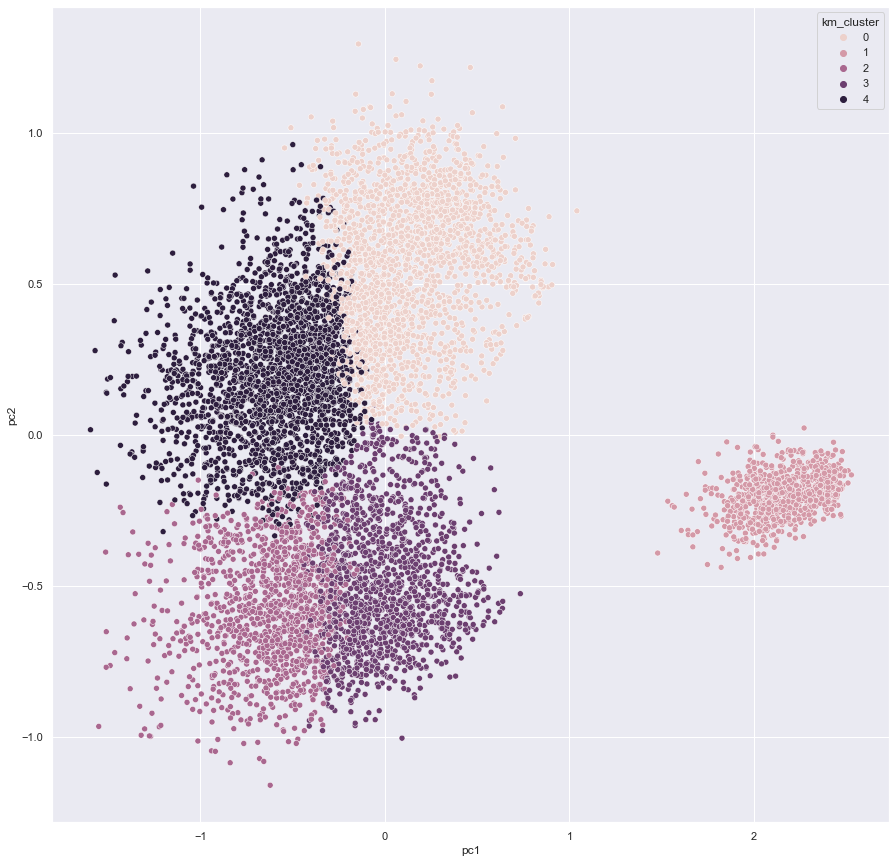

In [308]:

sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=standarized_df.sample(8000), x="pc1", y="pc2", hue="km_cluster")

Si bien las dos componentes principales conservan aproximadamente solo el 65% de la información, es suficiente para visualizar en el plano la separación entre ambos grupos.
Se observa que la PC1 se encuentra significativamente relacionada a la capacidad que tiene el jugador para atajar (altos valores en los scores que comienzan con "goalkeeping_") 